In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import multivariate_normal
from random import random

In [43]:
def uniform(min_val=0, max_val=1, sample_size=100, plot=False):
    samples = [((random() * (max_val - min_val)) + min_val) for i in range(sample_size)]
    if plot:
        plt.hist(samples, density=True, bins=15)
    else:
        return np.array(samples)
        

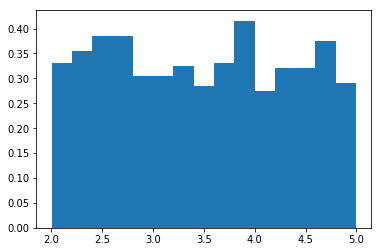

In [44]:
uniform(2, 5, 1000, True)

In [46]:
def gaussian(mu, sigma, sample_size=100, plot=False):
    samples = list()
    while len(samples) <= sample_size:
        # random sample x's
        xs = np.array([uniform(min_val=(mu[i]-4*sigma[i][i]), max_val=(mu[i]+4*sigma[i][i]), sample_size=1) 
              for i in range(len(mu))]).ravel()
        # reject if it does not fit
        if random() < multivariate_normal.pdf(xs, mu, sigma):
            samples.append(xs)
    if plot:
        n, bins, patches = plt.hist(np.array(samples).ravel(), density=True, bins=30)
        plt.plot(bins, multivariate_normal.pdf(bins, mu, sigma))
    else:
        return samples

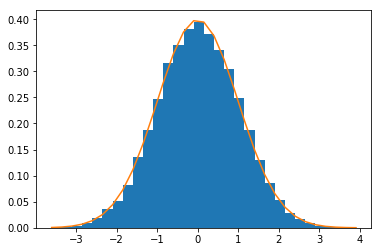

In [47]:
gaussian([0], [[1]], 10000, True)

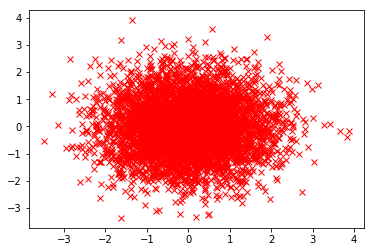

Min and Max values


array([3.86549146, 3.90058101])

In [50]:
x = np.array(gaussian(mu=[0,0], sigma=[[1,0],[0,1]], sample_size=5000))
plt.plot(x.T[0],x.T[1],'rx')
plt.show()
print("Min and Max values")
np.amin(x, axis=0)
np.amax(x, axis=0)

In [120]:
def non_uniform(sample_size, population_size, n_groups=6, distribution_fn=lambda x: (1/100)*np.exp(-(1/100)*x)):    
    # make distribution
    distribution = []
    while len(distribution) <= population_size:
        x = uniform(0, population_size, 1)[0]
        if random() <= distribution_fn(x):
            distribution.append(x)
    distribution = np.array(distribution)
    
    # make buckets
    counts, bins = np.histogram(distribution, n_groups)
    print(counts)
    buckets = []
    bucket_count_probab = []
    min_th = 0
    for max_th in range(1, len(bins)):
        tmp = distribution[np.where(distribution >= bins[min_th])]
        tmp = tmp[np.where(tmp < bins[max_th])]
        buckets.append(tmp)
        bucket_count_probab.extend([min_th]*counts[min_th])        
        min_th = max_th
    print([len(_) for _ in buckets])
    
    samples = []
    for i in range(sample_size):
        bucket_idx = bucket_count_probab[int(uniform(0, population_size, 1)[0])] # sample bucket with replacement
        bucket = buckets[bucket_idx]
        sample_idx = int(uniform(0, bucket.shape[0], 1)[0]) # sample from bucket..
        sample = bucket[sample_idx]
        buckets[bucket_idx] = np.delete(bucket, [sample_idx]) # ..without replacement
        samples.append(sample)
    
    return samples, distribution, bins

In [121]:
samples, distribution, bins = non_uniform(20, 1000, 10)

[549 220 133  62  20   8   4   3   0   2]
[549, 220, 133, 62, 20, 8, 4, 3, 0, 1]


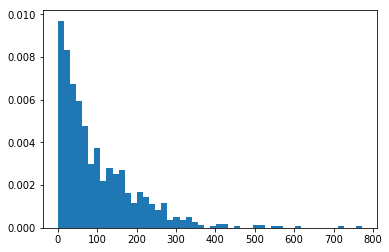

In [122]:
plt.hist(distribution.ravel(), bins=50, density=True)
plt.show()

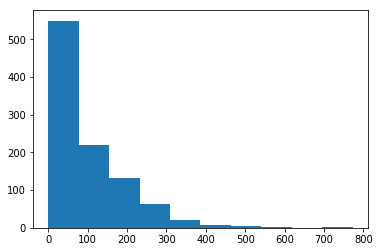

In [123]:
plt.hist(distribution, bins=bins)
plt.show()

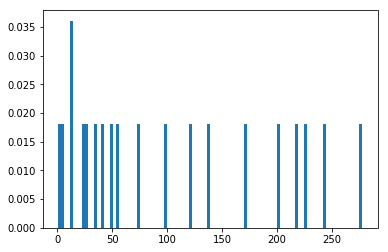

In [124]:
plt.hist(samples, density=True, bins=100)
plt.show()